In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
from src.dof import DiscreteDOF
from src.unitcell import HoneycombUnitCell
from src.lattice import Lattice
from src.gate import HoneycombGate

In [2]:
# charge 0 or 1 on each site
max_charge = 1
# two sites per cell
spc = 2
# degrees of freedom
dof = spc * [DiscreteDOF(0, max_charge)]
# unit cell
uc = HoneycombUnitCell(dof)
# number of unit cells in each dimension
L = [4, 4]
# values of degrees of freedom on lattice sites
vals = np.random.choice(range(0, max_charge+1), np.prod(L)*uc.spc)
# the lattice
lat = Lattice(uc, L, vals, periodic=True)

''

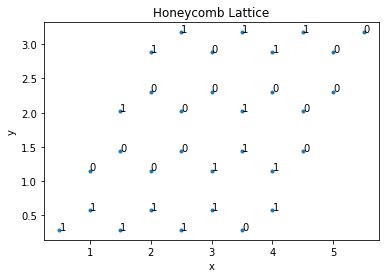

In [3]:
# plot the lattice
r = np.asarray([lat.position(site) for site in range(lat.nsites)])
plt.scatter(*r.T, marker='.')
for i, ri in enumerate(r):
    vali = lat.vals[i]
    plt.annotate(str(vali), ri, xycoords='data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Honeycomb Lattice')
;

In [4]:
# gate to enact dynamics
gate = HoneycombGate(uc)

In [5]:
# try sweeping over the lattice with gates
sweeps = 10
totalcharge = np.sum(lat.vals)
for s in range(sweeps):
    for i in range(lat.nsites):
        gate(lat, i)
        if np.sum(lat.vals) != totalcharge:
            print('Oh no!')

In [6]:
# run time evolution and track overlap of state with initial state
sweeps = 100
ovlps = np.zeros(sweeps*lat.nsites)
samples = 1000
for j in range(samples):
    initvals = cp.deepcopy(lat.vals)
    for s in range(sweeps):
        for i in range(lat.nsites):
            k = np.random.choice(range(lat.nsites))
            gate(lat, k)
            ovlps[s*lat.nsites + k] += np.dot(initvals, lat.vals)

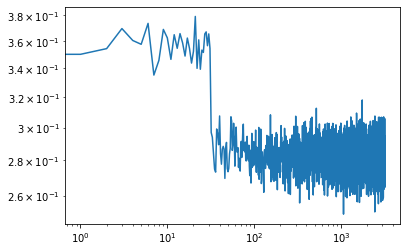

In [7]:
plt.plot(ovlps/samples/lat.nsites)
plt.xscale('log')
plt.yscale('log')